In [ ]:
from IPython.display import Image
import pandas as pd
import numpy as np
import mxnet as mx
from mxnet import nd, autograd, gluon
mx.random.seed(1)
import OpenSSL.SSL
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt; plt.rcParams['figure.figsize'] = (10, 5)
import pylab
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, Imputer, QuantileTransformer

# This import is needed to suppress warnings, not sure why thera are warnings.
import warnings
warnings.simplefilter('error')

# Set the context: Run computation on cpus
data_ctx = mx.cpu() # data
model_ctx = mx.cpu() # parameters

from keras import optimizers
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras import regularizers
#from sklearn.metrics import mean_squared_error

C:\Users\gilbe\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Exception ignored in: <_io.FileIO name='C:\\Users\\gilbe\\.keras\\keras.json' mode='rb' closefd=True>
Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-43d0d90c1001>", line 22, in <module>
    from keras import optimizers
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\keras\__init__.py", line 3, in <module>
    from . import activations
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\keras\activations.py", line 3, in <module>
    from . import backend as K
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\keras\backend\__init__.py", line 73, in <module>
    from .tensorflow_backend import *
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 1, in <module>
    import tensorflow as tf
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 24, in <module>
    from tensorflow.python import *
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\te

DeprecationWarning: builtin type EagerTensor has no __module__ attribute

## Deep Learning Demo

### Neural Networks

### Recurrent Neural Networks

### Optimization with Gradient Descent



### Deep Learning Framworks
* tensorflow
* Keras
* pytorch
* CNTK
* MXNet
* etc

### Linear Regression with MXNet
Estimate the parameters $\mathbf{w}$ and $b$ with a linear model of the form:
\begin{equation}
\hat{y} = \sum_{i=1}^n w_i x_i + b = \mathbf{w} \cdot \mathbf{X}^T + b
\end{equation}

To assess how well our predictions are with respect to the true targets we use the square loss:
\begin{equation}
L(y, \hat{y}) = \sum_{i=1}^n (\hat{y}_i - y_i)^2 
\end{equation}


Linear regression can be depicted as a Neural Network as in the picture below:

![title](img/onelayer.png)

Image from MXNet: http://gluon.mxnet.io/chapter02_supervised-learning/linear-regression-scratch.html

### Feed Forward Neural Networks

![title](img/multilayer-perceptron.png)

![title](img/rnn.jpg)

### Baby steps deep learning with MXNet
As an introduction to both MXNet and Deep Learning let's code a linear regression node from scratch.

We will be working with MXNet's NDArray data structure. It is very similar to numpy's multidimensional array, but with a few advantages.
* support for asynchronous computation on CPU, GPU and distributed architectures
* support for automatic differentiation

In [ ]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def real_fn(x):
    return 2 * x[:, 0] - 3.4 * x[:, 1] + 4.2

# ctx is the context
x = nd.random.normal(shape=(num_examples, num_inputs), ctx=data_ctx)
print('shape of x:', x.shape)
noise = 0.1 * nd.random_normal(shape=(num_examples, ), ctx=data_ctx)
y = real_fn(x) + noise
print('shape of y:', y.shape)
print(x[0])
print(y[0])

# Test that random points give predictions near the target,
# when using the optimal parameters
print('')
pred = 2 * x[0, 0] - 3.4 * x[0, 1] + 4.2
print('target', y[0])
print('prediction', pred)

shape of x: (10000, 2)
shape of y: (10000,)

[ 0.03629481 -0.49024427]
<NDArray 2 @cpu(0)>

[6.0096445]
<NDArray 1 @cpu(0)>

target 
[6.0096445]
<NDArray 1 @cpu(0)>
prediction 
[5.9394197]
<NDArray 1 @cpu(0)>


### Plotting one feature against the target

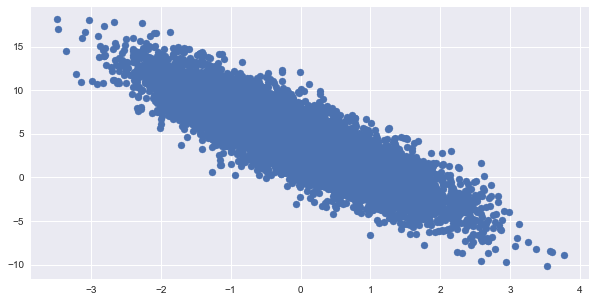

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 1].asnumpy(), y.asnumpy())
plt.show()

### Data iterators
In order to use data iterators the data has to be loaded into an ArrayDataset instance. 
X can be multidimensional but they have to have equal length along the first dimension: `len(X) == len(y)`



In [ ]:
# Shuffle data in this example
batch_size = 2**3
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(x, y),
                                  batch_size=batch_size, shuffle=True)
for i, (data, label) in enumerate(train_data):
    print(data, label)
    break


[[ 0.9087611  -1.0934283 ]
 [-0.64259374  0.65999126]
 [ 1.068709    0.67770654]
 [-1.407102    0.12982966]
 [-0.02910455 -1.008146  ]
 [ 0.61518943  1.8201766 ]
 [ 0.40254855 -1.6265308 ]
 [ 0.6268976   0.47722593]]
<NDArray 8x2 @cpu(0)> 
[ 9.763612    0.80846924  4.051443    0.8984949   7.514255   -0.6845095
 10.5126505   3.8590088 ]
<NDArray 8 @cpu(0)>


In [ ]:
# How many batches?
counter = 0
for i, (data, label) in enumerate(train_data):
    pass
print(i + 1)

1250


### Model parameters
The parameters are initialized on `model_ctx`

In [ ]:
w = nd.random_normal(shape=(num_inputs, num_outputs), ctx=model_ctx)
b = nd.random_normal(shape=num_outputs, ctx=model_ctx)
params = [w, b]

In [ ]:
# Allocate memory for each gradient
for param in params:
    param.attach_grad()

## Neural networks
The function `net(x)` is just a representation of a linear neuron

In [ ]:
def net(x):
    return mx.nd.dot(x, w) + b

## Loss function

In [ ]:
def square_loss(yhat, y):
    return nd.mean((yhat - y)**2)

## Optimizer
Optimization done with gradient descent
* `param[:]` is used to update parameters in place!

In [ ]:
def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

## Training loop
* compute predictions for `yhat` and compute the loss
* compute gradients by invoking `loss.backward()`
* update model parameters

In [ ]:
def plot_loss(losses, x, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(x[:sample_size, :].asnumpy(),
            net(x[:sample_size, :]).asnumpy(), 'or', 
             label='Estimated')
    fg2.plot(x[:sample_size, 1].asnumpy(),
            real_fn(x[:sample_size, :]).asnumpy(), '*g', label='Real')
    fg2.legend()
    plt.show()
    

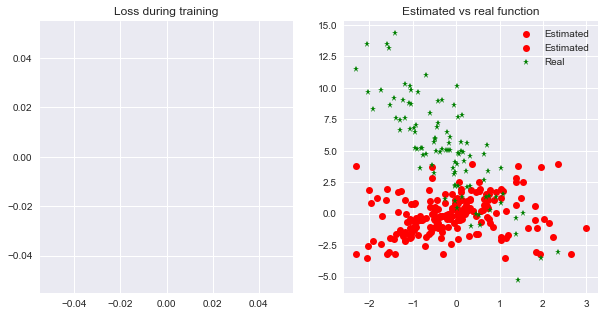

epoch: 0 cumulative loss: 36.50973535308838
epoch: 1 cumulative loss: 22.077376329422
epoch: 2 cumulative loss: 13.3521841837883
epoch: 3 cumulative loss: 8.07711467370987
epoch: 4 cumulative loss: 4.887894183135033
epoch: 5 cumulative loss: 2.9595741784095764
epoch: 6 cumulative loss: 1.7936680288672446
epoch: 7 cumulative loss: 1.0887097429782153
epoch: 8 cumulative loss: 0.6624235443115234
epoch: 9 cumulative loss: 0.4046315411657095


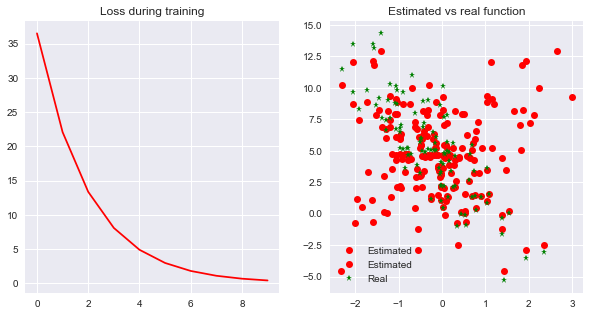

In [ ]:
epochs = 10
learning_rate = 0.0001
num_batches = num_examples/batch_size
losses = []
plot_loss(losses, x)

for e in range(epochs):
    cumulative_loss = 0
    for _, (data, label) in enumerate(train_data):
        # check data and parameters in same context!
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx).reshape((-1, 1))
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        cumulative_loss += loss.asscalar()
    print('epoch: {} cumulative loss: {}'.format(e, 
                                          cumulative_loss/num_batches))
    losses.append(cumulative_loss/num_batches)
plot_loss(losses, x)


In [ ]:
print('weights:', params[0].shape)
print(params[0])
print('')
print('bias:', params[1].shape)
print(params[1])

weights: (2, 1)

[[ 1.7958331]
 [-2.984357 ]]
<NDArray 2x1 @cpu(0)>

bias: (1,)

[3.9020536]
<NDArray 1 @cpu(0)>


## Example from finance: Prediction of prices for next day
Data is loaded from tiingo, a platform for free and licensed financial data
Other vendors include QUANDL, QUANTOPIA ETC.

### Load and preprocess data

In [ ]:
data = pd.read_csv('closing_prices_tiingo.csv', parse_dates=True, infer_datetime_format=True)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.head()

,AAPL,ABBV,ABT,AMGN,AMZN,AVGO,BA,BAC,BMY,C,...,PFE,PG,PM,T,UNH,V,VZ,WFC,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,27.294495,NaN,21.129273,49.792737,133.90,16.673423,45.640616,14.639460,19.648366,32.843185,...,13.934719,47.114847,34.709530,18.323770,27.878733,20.694802,20.828887,22.385830,43.935552,53.998112
2010-01-05,27.341684,NaN,20.958563,49.365427,134.69,16.797192,47.135432,15.115313,19.341720,34.098954,...,13.735967,47.130264,34.407096,18.234010,27.834524,20.457660,20.566022,23.000375,43.498060,54.208950
2010-01-06,26.906778,NaN,21.074956,48.994453,132.25,16.929801,48.565255,15.292591,19.334054,35.161528,...,13.691800,46.906716,34.407096,17.971143,28.108625,20.182950,20.274994,23.033151,43.400840,54.677481
2010-01-07,26.857038,NaN,21.249546,48.545833,130.00,16.823714,50.531263,15.796435,19.349386,35.258126,...,13.640272,46.652332,34.836130,17.769366,29.187345,20.370786,20.154309,23.868932,43.425145,54.505686
2010-01-08,27.035592,NaN,21.358180,48.977198,133.52,16.947483,50.043823,15.656478,19.027407,34.678540,...,13.750689,46.590664,34.646230,17.639188,28.913244,20.427137,20.167013,23.647696,43.206399,54.287039


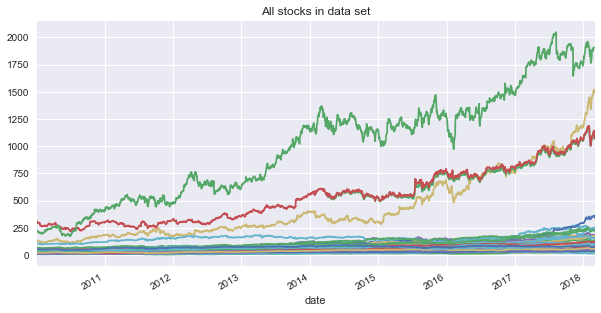

In [ ]:
data.plot(legend=False, title='All stocks in data set')
plt.show()

In [ ]:
aapl = data['AAPL']
aapl.head()

date
2010-01-04    27.294495
2010-01-05    27.341684
2010-01-06    26.906778
2010-01-07    26.857038
2010-01-08    27.035592
Name: AAPL, dtype: float64

## Plot the price data

In [ ]:
def to_return(x, period=1):
    """ This function supposes that the input is a
    dataframe or series"""
    return (x - x.shift(periods=period, axis='index'))/x.shift(periods=period)

We are using the pandas API to plot(), pandas knows we are plotting a time series and sets the time axis automatically.


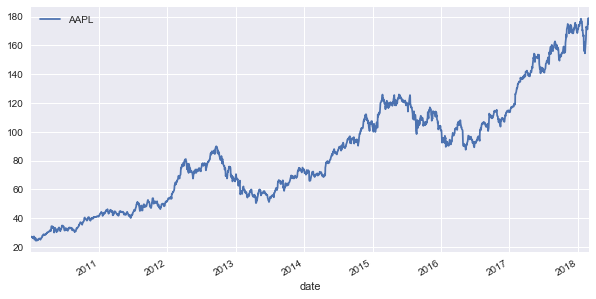

In [ ]:
aapl.plot(legend=True)
plt.show()

Returns are computed as
\begin{equation}
R_{t+1} = \frac{P_{t+1}}{P_t} - 1
\end{equation}

date
2010-01-04         NaN
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
Name: AAPL, dtype: float64
Shape of data: (2055,)


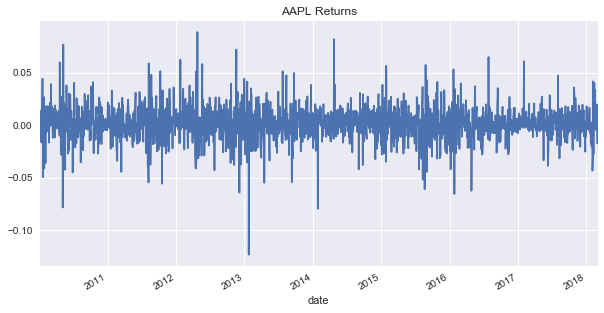

In [ ]:
ret = to_return(aapl)
print(ret.head())
print('Shape of data: {}'.format(ret.shape))
ret.plot(title='AAPL Returns')
plt.show()

In [ ]:
stats.probplot(ret, dist='norm', plot=pylab)
plt.title('QQ-plot for AAPL returns')
pylab.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-5790ee74d468>", line 1, in <module>
    stats.probplot(ret, dist='norm', plot=pylab)
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\scipy\stats\morestats.py", line 605, in probplot
    slope, intercept, r, prob, sterrest = stats.linregress(osm, osr)
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py", line 117, in linregress
    prob = 2 * distributions.t.sf(np.abs(t), df)
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py", line 1817, in sf
    cond1 = self._open_support_mask(x) & (scale > 0)
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py", line 879, in _open_support_mask
    return (self.a < x) & (x < self.b)

During handling of the above exception

RuntimeWarning: invalid value encountered in greater

## Divide in training and test sets
* Because we are working with time series where order matters we will not randomize the data sets. 
* Randomization is otherwise done in data sets where the assumption of independent and identically distributed (i.i.d.) applies. 

Start by transforming data to a rolling window of x daily returns/prices, depending on the data to predict on. For example for a window of 30 days:
\begin{equation}
\{S_{t-29}, S_{t-28}, \dots, S_{t}\}
\end{equation}
where $t\geq 30$.

To recap: we use the rolling window to predict the $S_{t+1}$ prices as follows

\begin{equation}
S_{t + 1} = F_{\theta}(S_{t-29}, \dots, S_t)
\end{equation}

The machine learning task is to estimate the parameters $\theta = \{W_1, W_2, \dots, W_n\}$


In [ ]:
def to_tensor(data, timesteps=30):
    x = np.array([data[i:i + timesteps]
                  for i in range(len(data) - timesteps)], dtype=float)
    return x

In [ ]:
price_input = to_tensor(aapl, timesteps=31)
price_input.shape

(2024, 31)

In [ ]:
# Get train and development sets
# Note this function assumes a time series, indexing has to be 
# modified if using a dataframe
# x is either price series or return series
def get_train_dev(x, dev=0.85):
#    if to_return:
#        x = to_return(x)
    dev_ix = int(dev * len(x))
    train = x.iloc[:dev_ix]
    dev = x.iloc[dev_ix:]
    
    # impute data
    # dont use pipeline in order to inverse transform
    # reshape([-1, 1]) is only needed in the case of working with a 1-Dim series
    imputer = Imputer(strategy='median')
    train = imputer.fit_transform(train.values.reshape([-1, 1]))
    dev = imputer.transform(dev.values.reshape([-1, 1]))
    
    # normalize
    scaler = MinMaxScaler(feature_range=(-1, 1))
    train = scaler.fit_transform(train.reshape(-1, 1))
    dev = scaler.transform(dev.reshape(-1, 1))
    
    # transform data to tensors
    # for now we index in 2-Dim because we started with
    # 1-Dim time series
    # in case of using a dataframe indexes are 3-Dim
    train = to_tensor(train)
    x_train = train[:,:-1]
    y_train = train[:,-1]
    
    dev = to_tensor(dev)
    x_dev = dev[:, :-1]
    y_dev = dev[:, -1]
    
    return x_train, y_train, x_dev, y_dev

In [ ]:
x_train, y_train, x_dev, y_dev = get_train_dev(ret)
print(x_train.shape)
print(y_train.shape)
print(x_dev.shape)
print(y_dev.shape)

(1716, 29, 1)
(1716, 1)
(279, 29, 1)
(279, 1)


### Keras model
Now we train a LSTM in keras. Keras is a high level library made for easy prototyping. It is built on top of tensorflow, theano and CNTK. Models can be built from the Sequential class, it is also possible to use their functional API.

In [ ]:
def plot_error_curves(history):
    f1, axarr1 = plt.subplots(2, 1, sharex=True, figsize=(8, 10))
    axarr1[0].plot(history.history['loss'])
    axarr1[0].set_title('Training Loss')
    axarr1[1].plot(history.history['val_loss'])
    axarr1[1].set_title('Dev Loss')
    axarr1[1].set_xlabel('Epochs')
#    f1.suptitle('MSE for stock: {}'.format(st_name))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import os
#from utils.utils import PROJECT_DATA_DIR
import matplotlib.pyplot as plt
#from load_transform import (load_transform,
#                            split_train_dev_test,
#                            inverse_return)
from keras import optimizers
import keras
import random
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.utils import shuffle
from scipy.ndimage.interpolation import shift
from keras import regularizers
from sklearn.metrics import (mean_squared_error,
                             classification_report,
                             precision_score,
                             recall_score,
                             f1_score)


""" Main keras model"""
def build_model(drop_rate, lr, units, decay,
                look_back,
                no_features=1,
                no_outputs=1
                ):
    """ Arguments
    drop_rate -- drop_rate in dropout
    learning_rate -- learning rate
    time_steps -- time steps for the sequence
    units -- number of hidden units or neurons
    decay -- proportion of decay for learning rate
    no_features -- number of features, default 1 for a 1-dim time series
    no_outputs -- number of targets or outputs from the model
    """

    optim = optimizers.Adam(lr=lr,
                            beta_1=0.9,
                            beta_2=0.999,
                            decay=0.0,
                            clipnorm=1.0)

    # TODO: how to implement many layers in keras?
    ret_seq = False
    model = Sequential()
    model.add(LSTM(units,input_shape=(look_back,no_features),
                   return_sequences=ret_seq,
                   kernel_regularizer=regularizers.l2(0.01),
                   recurrent_regularizer=regularizers.l2(0.01),
                   activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(no_outputs, kernel_regularizer=regularizers.l2(0.01)))
    model.compile(loss='mean_squared_error',
                  optimizer=optim,
                  metrics=['mse'])
    return model


def train_lstm(X_train, Y_train, X_dev, Y_dev,
               epochs, drop_rate, batch_size, decay,
               look_back, lr, units):

    num_features = X_train.shape[-1]
    num_outputs = Y_train.shape[-1]
    model = build_model(drop_rate, lr, units, decay, look_back,
                        no_features=num_features, no_outputs=num_outputs)

    history = model.fit(X_train, Y_train, epochs, batch_size,
                        verbose=0, validation_data=(X_dev, Y_dev),
                        shuffle=False)
    return model, history


def plot_error_curves(history):
    f1, axarr1 = plt.subplots(2, 1, sharex=True, figsize=(8, 10))
    axarr1[0].plot(history.history['loss'])
    axarr1[0].set_title('Training Loss')
    axarr1[1].plot(history.history['val_loss'])
    axarr1[1].set_title('Dev Loss')
    axarr1[1].set_xlabel('Epochs')
#    f1.suptitle('MSE for stock: {}'.format(st_name))
    plt.show()


def hit_ratio(p_true, p_pred, move=1, diff=True):
    """ if working with price series use diff otherwise use
    real the args directly"""
    if diff:
        arg_true = p_true - shift(p_true, move, cval=np.NaN)
        arg_pred = p_pred - shift(p_pred, move, cval=np.NaN)
    else:
        arg_true = p_true
        arg_pred = p_pred
    P = np.multiply(arg_true, arg_pred)
    result = np.mean(np.where(P > 0, 1, 0))
    return result


def train(x_train, y_train, x_dev, y_dev, scaler):
    """ Training function, calls train_lstm and optimizes
    hyperparameters"""

    patience = 25
    count = 0
    optimal_parameters = {}
    old_hit = 0
    accepted_hit = 0
    """ Maybe good to save for each new better result?"""
    while  (count < patience): #or (accepted_hit < 0.88):# or (count < patience):
        print('')
        print('.' * 50)
        print('While iteration:', count)
        params = {'drop_rate': np.random.uniform(0.1, 0.5),
                  'lr': 10**np.random.uniform(-4, -2),
                  'units': np.random.randint(50, 200),
                  'epochs': np.random.randint(200, 450),
                  'decay': 1e-6,
                  'look_back': x_train.shape[1],
#                  'optim': random.sample(['SGD', 'RMSprop', 'Adam'], 3)[0],
                  'batch_size': shuffle(np.array([2**5, 2**6,
                                                  2**7, 2**8]))[0]}
        print('')
        print(params)
        print('')
        model, history = train_lstm(x_train, y_train, x_dev, y_dev, **params)
        train_predict = model.predict(x_train)
        dev_predict = model.predict(x_dev)

#        dot_prod = np.dot(y_train, train_predict)
#        print('dot-product of y_pred and y:')
#        print(dot_prod)

        if np.any(np.isnan(train_predict)) or np.any(np.isinf(train_predict))\
        or np.any(np.isnan(y_train)) or np.any(np.isinf(y_train)):
            print('')
            print('check if predictions for training dataset are too big!')
            print('are there any Nas or inf? Yes')
            print('train_predict =', train_predict)
            print('y_train =', y_train)
        if np.any(np.isnan(dev_predict)) or np.any(np.isinf(dev_predict))\
        or np.any(np.isinf(y_dev)) or np.any(np.isinf(y_dev)):
            print('')
            print('check if predictions for dev dataset are too big!')
            print('are there any Nas or inf? Yes')
            print('dev_predict =', dev_predict)
            print('y_dev =', y_dev)

        mse_dev = mean_squared_error(y_dev, dev_predict)
        mse_train = mean_squared_error(y_train, train_predict)

        hit_train = hit_ratio(scaler.inverse_transform(y_train),
                              scaler.inverse_transform(train_predict), diff=False)
        hit_dev = hit_ratio(scaler.inverse_transform(y_dev),
                            scaler.inverse_transform(dev_predict), diff=False)

#        hit_train = hit_ratio(y_train, train_predict)
#        hit_dev = hit_ratio(y_dev, dev_predict)

        # if diff betwenn train mse and dev mse
        # less than one then no so much overfit
        print('mse for train set:', mse_train)
        print('mse for dev set:', mse_dev)
        print('-' * 10)
        print('hit-ratio train:', hit_train)
        print('hit-ratio dev:', hit_dev)
        print('train_predict.shape:', train_predict.shape)
        print('dev_predict.shape:', dev_predict.shape)
#        print('-' * 10)
#        print('y_dev =', y_dev)
#        print('-' * 10)
#        print('dev_predict =', dev_predict)

        print('-' * 10)
        print('y_dev =', scaler.inverse_transform(y_dev))
        print('-' * 10)
        print('dev_predict =', scaler.inverse_transform(dev_predict))

        # TODO: add sequence length as hyper parameter
        # and then pop from optimal parameters
        if (np.abs(mse_train - mse_dev) < 2) and (np.abs(hit_dev - hit_train) < 0.07):
            old_hit = hit_dev
            # new code 2018-03-27
            # added if cond and put parameter update under condition
            if accepted_hit < old_hit:
                """Swap accepted and old value"""
                accepted_hit, old_hit = old_hit, accepted_hit
                print('accepted_hit:', accepted_hit)
                optimal_parameters['drop_rate'] = params['drop_rate']
                optimal_parameters['lr'] = params['lr']
                optimal_parameters['units'] = params['units']
                optimal_parameters['epochs'] = params['epochs']
                optimal_parameters['decay'] = params['decay']
                optimal_parameters['look_back'] = params['look_back']
                optimal_parameters['batch_size'] = params['batch_size']
        del model, history
        model, history = None, None
        if len(optimal_parameters) > 0:
            print('')
            print('The optimal parameters found so far', optimal_parameters)
        else:
            print('')
            print('No optimal parameters found yet')
        del model
        del history
        count += 1
    # TODO:
    if len(optimal_parameters) == 0:
        """ break program with message that the """
        pass

    print('')
    print('The optimal parameters are:', optimal_parameters)
    keras.backend.clear_session()
    """ Has to retrain as the model is deleted during the
    while loop"""
    model, history = train_lstm(x_train, y_train, x_dev, y_dev,
                                **optimal_parameters)
    return optimal_parameters, model, history


if __name__ == '__main__':

    """ This example is for only one stock just to see that
    it works. Later we can test a model with all the stocks
    at the same time.
    """
    close = data#load_transform()
    print('shape of close dataframe:', close.shape)
    print('type for close:', type(close))
    close_stock = close#["AAPL"]
    print('shape of close_stock:', close_stock.shape)

    # TODO: move the train, dev and test split out of
    # the train() function

    """ if data transform to returns the order is as follows:
        -first data transformed to returns
        -then normalized

        -inverse is in the reversed order, first denormalized then
        transform to prices
        """
    to_ret = False
    (x_train, y_train, x_dev, y_dev,
     x_test, y_test, scaler, stock_names) = split_train_dev_test(
                                             close_stock,
                                             normalize=True,
                                             to_ret=to_ret,
                                             dev=0.85)
    print('')
    print('training algorithm:')
    print('shape train set:', x_train.shape, y_train.shape)
    print('type of train set:', type(x_train))
    print('shape dev set:', x_dev.shape, y_dev.shape)
    print('shape test set:', x_test.shape, y_test.shape)
    optimal_parameters, model, history = train(x_train, y_train,
                                               x_dev, y_dev, scaler)

    """Both targets and predictions have to be transformed"""
    dev_predict = model.predict(x_dev)
    dev_predict = pd.DataFrame(scaler.inverse_transform(dev_predict),
                               columns=stock_names)
    y_dev = pd.DataFrame(scaler.inverse_transform(y_dev), columns=stock_names)

    if to_ret:
        """ dev_pridct are the returns computed by the model"""
        dev_predict = dev_predict.apply(inverse_return, dev_predict)
        y_dev = y_dev.apply(inverse_return, y_dev)

    plt.figure(figsize=(10, 10))
    dev_predict.plot(figsize=(10, 10))

    y_dev.plot(figsize=(10, 10))
    plot_error_curves(history)

    # Compare the first 5 stocks in predictions and real data
    ax = dev_predict.iloc[:, 0:5].plot(subplots=True, figsize=(15, 20),
                         title='Predictions on dev-set')
    y_dev.iloc[:, 0:5].plot(ax=ax, subplots=True, figsize=(15, 20),
              title='Real data')


Exception ignored in: <_io.FileIO name='C:\\Users\\gilbe\\.keras\\keras.json' mode='rb' closefd=True>
Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-f77fa6921796>", line 9, in <module>
    from keras import optimizers
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\keras\__init__.py", line 3, in <module>
    from . import activations
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\keras\activations.py", line 3, in <module>
    from . import backend as K
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\keras\backend\__init__.py", line 73, in <module>
    from .tensorflow_backend import *
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 1, in <module>
    import tensorflow as tf
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 24, in <module>
    from tensorflow.python import *
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\te

DeprecationWarning: builtin type EagerTensor has no __module__ attribute

In [ ]:
num_features = x_train.shape[-1]
print('num_features', num_features)
num_outputs = y_train.shape[-1]
print('num_outputs', num_outputs)
drop_rate = 0.4
lr = 0.001
units = 100
epochs = 150
decay = 1e-6
look_back = x_train.shape[1]
batch_size = 64

optim = optimizers.Adam(lr=lr,
                        beta_1=0.9,
                        beta_2=0.999,
                        decay=0.0,
                        clipnorm=1.0)

ret_seq = False
model = Sequential()
model.add(LSTM(units,input_shape=(look_back, num_features),
#                   return_sequences=ret_seq,
               kernel_regularizer=regularizers.l2(0.01),
               recurrent_regularizer=regularizers.l2(0.01),
               activation='relu'))
model.add(Dropout(drop_rate))
model.add(Dense(no_outputs, kernel_regularizer=regularizers.l2(0.01)))
model.compile(loss='mean_squared_error',
              optimizer=optim,
              metrics=['mse'])

history = model.fit(x_train, y_train, epochs, batch_size,
                    verbose=0, validation_data=(x_dev, y_dev),
                    shuffle=False)

train_predict = model.predict(x_train)
dev_predict = model.predict(x_dev)

mse_train = mean_squared_error(y_train, train_predict)
mse_dev = mean_squared_error(y_dev, dev_predict)

plot(history)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



num_features 1
num_outputs 1
Traceback (most recent call last):
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-0cd0cd67717c>", line 13, in <module>
    optim = optimizers.Adam(lr=lr,
NameError: name 'optimizers' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 1821, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\gilbe\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\

NameError: name 'optimizers' is not defined